In [1]:
# Imports
import pandas as pd
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# Read clean data into Pandas dataframes
rock_clean = pd.read_csv('./Data/rock_clean_round2.csv')
rap_clean = pd.read_csv('./Data/rap_clean_round2.csv')

# Read in original data
rock = pd.read_csv('./Data/rock_round2.csv')
rap = pd.read_csv('./Data/rap_round2.csv')

In [4]:
# Get shapes of original and cleaned data
print(rock_clean.shape)
print(rock.shape)

(993, 4)
(993, 4)


In [5]:
# Get the shape of both original and cleaned data
print(rap_clean.shape)
print(rap.shape)

(996, 4)
(996, 4)


In [13]:
# Drop null values from the rock dataset
rock_clean['title'].dropna(inplace=True)

In [14]:
# Get null value counts
rock_clean['title'].isnull().sum()

0

In [16]:
# Drop null values from the rap dataset
rap_clean['title'].dropna(inplace=True)

In [17]:
# Get null value counts
rap_clean['title'].isnull().sum()

0

In [18]:
rap_clean

,title,comments,age,thread
0,kodak v corona,13,632.171650,rap
1,put,25,1742.321650,rap
2,fastest someone rap able understand every word,0,85.088317,rap
3,amazon echo tyga edition,0,236.021650,rap
4,would like see would win hits hits yall got,1,92.321650,rap
...,...,...,...,...
991,looking vinyl gift please help,0,11782.554984,rap
992,found guy youtube,0,11783.121650,rap
993,dame dash reclaiming throne,0,11787.071650,rap
994,made new song maybe want hear,0,11787.338317,rap


In [19]:
# Define function to find and visualize the most common words within thread titles
def plot_common_words(column):
    
    cv = CountVectorizer(stop_words='english')
    words = cv.fit_transform(column)
    df_words = pd.DataFrame(words.toarray(), columns=cv.get_feature_names())
    df_common = pd.DataFrame(df_words.sum().sort_values(ascending=False).head(10))
    df_common.rename(columns={0: 'Count'}, inplace=True)
    
    ax = sns.barplot(df_common.index, df_common['Count']);
    ax.set(xlabel='Word', ylabel='Word Count')

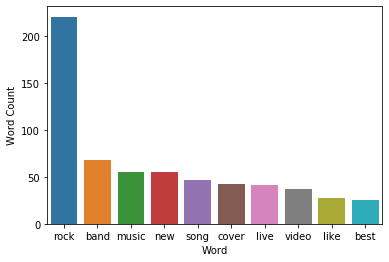

In [20]:
# Visualize the most common unique words in rock
plot_common_words(rock_clean['title'])

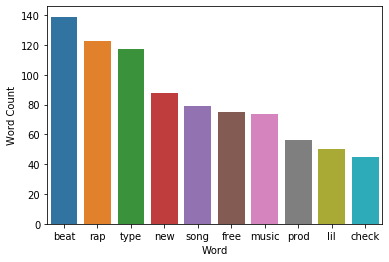

In [21]:
# Visualize the most common unique words in rap
plot_common_words(rap_clean['title'])

In [22]:
# Concatenate the two dataframes prior to model development
df = pd.concat([rock_clean, rap_clean], axis=0)

In [26]:
# Reassign rock to 1 and rap to 0 prior to binary classification
df['thread'] = df['thread'].map(lambda x: 1 if x == 'rock' else 0)

The data contained in the DataFrame below is going to be used to train a model in order to classify subreddit posts by name. This is a binary classification problem so I used 1 to represent rock and 0 to represent rap.

In [27]:
# Show the first 5 rows
df.head()

,title,comments,age,thread
0,funkadelic maggot brain,16,841.220417,1
1,motorhead motorhead live germany,0,289.603750,1
2,bands prefer,5,125.553750,1
3,anyone special affinity towards lengthier songs,12,654.987084,1
4,jebediah jerks attention,0,181.837084,1


In [28]:
# Find the shape of the new combined text dataframe
df.shape

(1989, 4)

The code below was only ran once; the file train.csv contains the original data used for model development.

In [29]:
# Create .csv file containing training data for the model
df.to_csv('./Data/train_round2.csv', index=False)